In [9]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='grade3')

In [25]:
#User-supplied
obsfile = '/glade/p/work/manab/fcast/data/dly/obsflow.dly.HHDW1.csv'
summaoutfile = '/glade/p/work/manab/fcast/PNW/output/testdeleteconcat/paramtest7468.nc'
routefile = '/glade/p/work/manab/SHARP/PNW_route/output/paramtest21.nc'

hid = 17007511  #HRU ID to be plotted
sid = 17003601  #Reach ID to be plotted
pltwidth = 15
pltheight = 5
starttime1 = '2011-01-01'
endtime1 = '2016-12-31'

In [26]:
# Observed streamflow
o = pd.read_csv(obsfile)
o.rename(columns = {'Year':'time', 'cfs': 'flow'}, inplace=True)

o['flow'] = o['flow']*0.028316847 #Convert to CMS
o['time'] = pd.to_datetime(o['time'])  #convert to datetime format
o.loc[o['flow'] < 0 , 'flow'] = np.nan
o.fillna(method='ffill', limit=10)

o = o.set_index(['time'])
obs = o.to_xarray()

In [27]:
#Unit conversion
out = xr.open_dataset(summaoutfile).set_index(hru = 'hruId')
out

<xarray.Dataset>
Dimensions:                 (hru: 1, midToto: 8, time: 19248)
Coordinates:
  * time                    (time) datetime64[ns] 2010-06-01 ...
  * hru                     (hru) int64 17007511
Dimensions without coordinates: midToto
Data variables:
    mLayerVolFracLiq        (time, midToto, hru) float64 ...
    pptrate                 (time, hru) float64 ...
    nSnow                   (time, hru) int32 ...
    nSoil                   (time, hru) int32 ...
    nLayers                 (time, hru) int32 ...
    scalarSWE               (time, hru) float64 ...
    scalarAquiferStorage    (time, hru) float64 ...
    scalarTotalSoilWat      (time, hru) float64 ...
    scalarRainPlusMelt      (time, hru) float64 ...
    scalarAquiferRecharge   (time, hru) float64 ...
    scalarAquiferTranspire  (time, hru) float64 ...
    scalarAquiferBaseflow   (time, hru) float64 ...
    averageInstantRunoff    (time, hru) float64 ...
Attributes:
    summaVersion:     v2.0.0
    buildTime:    

In [34]:
out['pptrate'] = out['pptrate']*3600      #kg m-2 s-1 -> mm/hr
out['averageInstantRunoff'] = out['averageInstantRunoff']*3600000  #m/s to mm/h
out['scalarAquiferBaseflow'] = out['scalarAquiferBaseflow']*3600000  #m/s to mm/h
out['scalarRainPlusMelt'] = out['scalarRainPlusMelt']*3600000  #m/s to mm/h
out['scalarAquiferRecharge'] = out['scalarAquiferRecharge']*3600000  #m/s to mm/h
out['scalarAquiferStorage'] = out['scalarAquiferStorage']*1000  #m to mm
out['scalarAquiferTranspire'] = out['scalarAquiferTranspire']*3600000  #m/s to mm/h

# Summary Statistics

In [54]:
stat = {}
stat['pptrate (mm/h)'] = out['pptrate'].sum().values
stat['averageInstantRunoff (mm/h)'] = out['averageInstantRunoff'].sum().values
stat['scalarRainPlusMelt (mm/h)'] = out['scalarRainPlusMelt'].sum().values
stat['scalarAquiferRecharge (mm/h)'] = out['scalarAquiferRecharge'].sum().values
stat['scalarAquiferBaseflow (mm/h)'] = out['scalarAquiferBaseflow'].sum().values
stat['scalarAquiferStorage (mm)'] = out['scalarAquiferStorage'].sum().values
stat['scalarAquiferTranspire (mm/h)'] = out['scalarAquiferTranspire'].sum().values

for x in stat:
    print (x,':',stat[x])

pptrate (mm/h) : 4516.026077368598
averageInstantRunoff (mm/h) : 6629.139969230255
scalarRainPlusMelt (mm/h) : 2567.3282355087267
scalarAquiferRecharge (mm/h) : 3314.578543878844
scalarAquiferBaseflow (mm/h) : 3314.5614253513804
scalarAquiferStorage (mm) : 2774.8182337137987
scalarAquiferTranspire (mm/h) : 0.0


# PLOTS

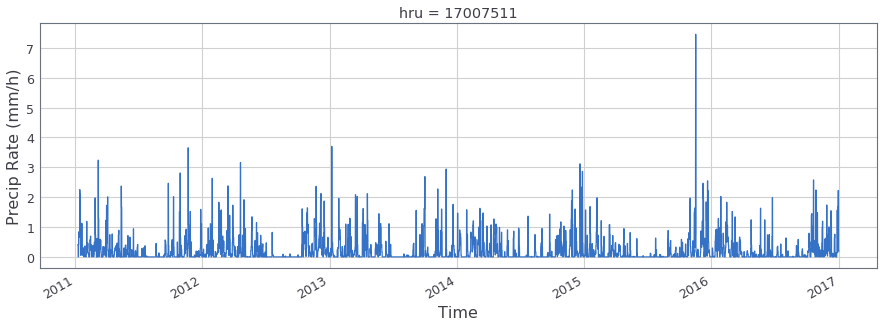

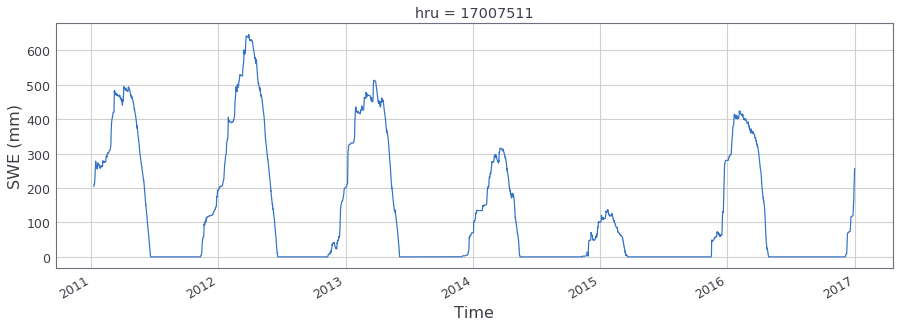

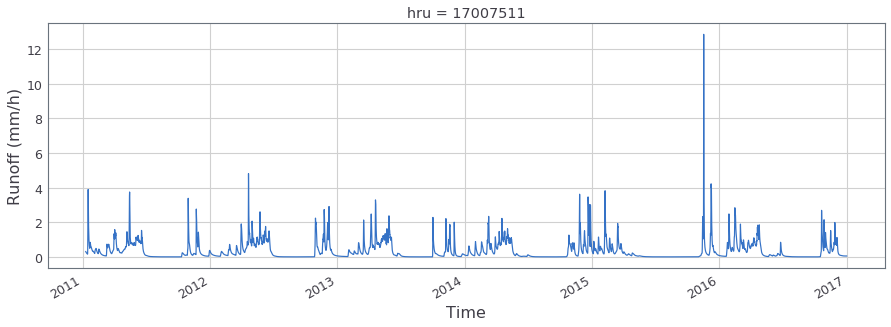

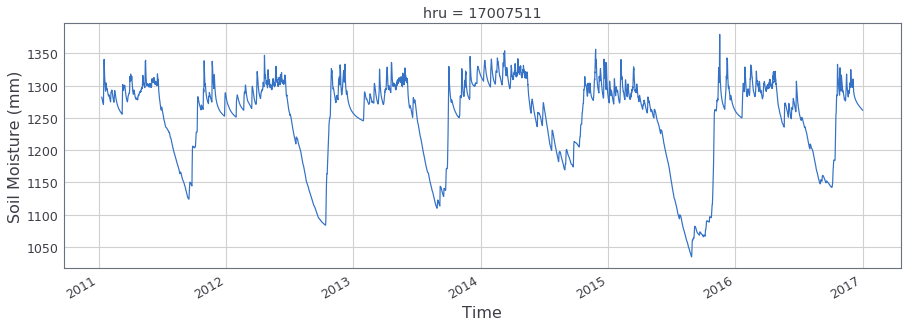

In [18]:
#Plot forcing and diagnostic variables


# PPTRATE
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['pptrate'].loc[starttime1:endtime1].plot()
plt.ylabel('Precip Rate (mm/h)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/pptrate.png', bbox_inches='tight', dpi=300)
plt.show()

# SWE
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarSWE'].loc[starttime1:endtime1].plot()
plt.ylabel('SWE (mm)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/swe.png', bbox_inches='tight', dpi=300)
plt.show()

#averageInstantRunoff
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['averageInstantRunoff'].loc[starttime1:endtime1].plot()
plt.ylabel('Runoff (mm/h)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/runoff.png', bbox_inches='tight', dpi=300)
plt.show()

#scalarTotalSoilWat
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarTotalSoilWat'].loc[starttime1:endtime1].plot()
plt.ylabel('Soil Moisture (mm)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/sm.png', bbox_inches='tight', dpi=300)
plt.show()



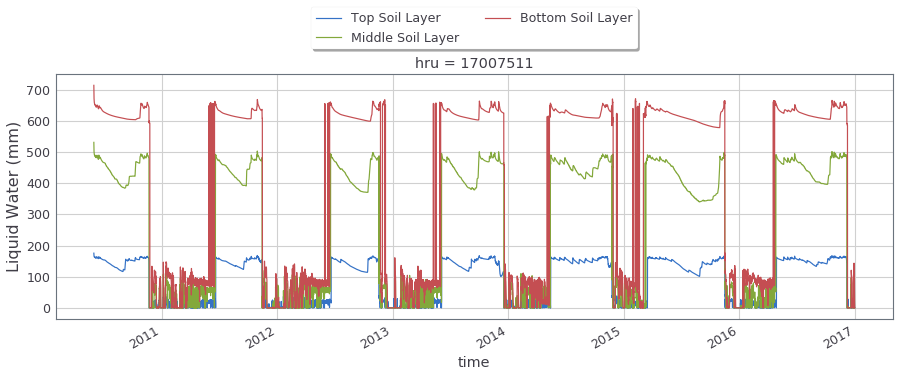

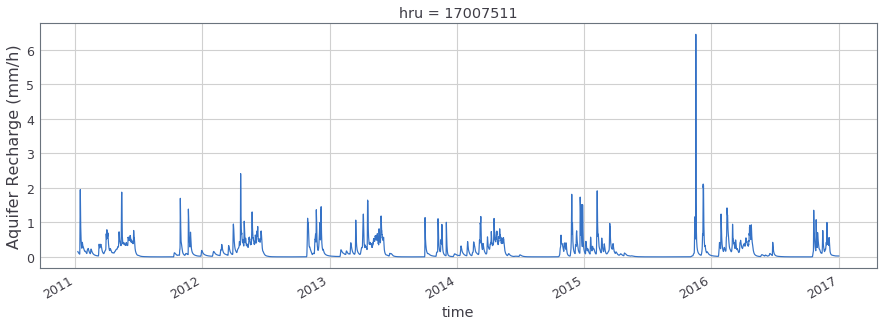

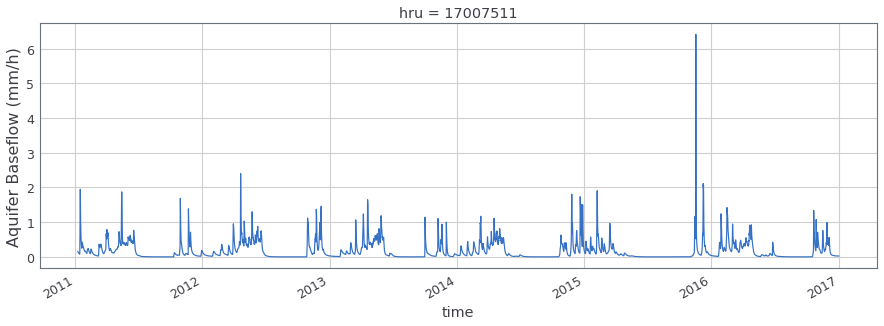

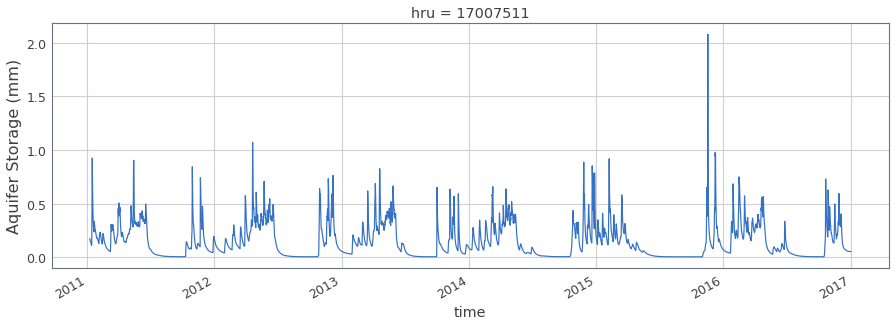

In [19]:
#mLayerVolFracLiq
iden_water = 1000
plt.figure(figsize=(pltwidth, pltheight))
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 0]*iden_water*0.5).plot(label='Top Soil Layer')
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 1]*iden_water*1.5).plot(label='Middle Soil Layer')
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 2]*iden_water*2.0).plot(label='Bottom Soil Layer')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fancybox=True, shadow=True)
plt.ylabel('Liquid Water (mm)', fontsize=16) 
plt.show()


plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarAquiferRecharge'].loc[starttime1:endtime1].plot()
plt.ylabel('Aquifer Recharge (mm/h)', fontsize=16)
plt.show()


plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarAquiferBaseflow'].loc[starttime1:endtime1].plot()
plt.ylabel('Aquifer Baseflow (mm/h)', fontsize=16)
plt.show()

plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarAquiferStorage'].loc[starttime1:endtime1].plot()
plt.ylabel('Aquifer Storage (mm)', fontsize=16)
plt.show()
